# Importing the libraries

In [54]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime 

# Load Data

In [55]:
Self_harm_EDA = pd.read_csv('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Final_Data/Self_harm_EDA.csv', index_col=0)
Self_harm_EDA 

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population
6,Male,White Non-Hispanice,00-04,2001,0,5862483
7,Male,Black,00-04,2001,0,1585658
8,Male,Hispanic,00-04,2001,0,1900490
9,Male,Other Non-Hispanic,00-04,2001,0,518145
11,Female,White Non-Hispanice,00-04,2001,0,5572690
...,...,...,...,...,...,...
5780,Male,Other Non-Hispanic,85+,2018,0,116478
5783,Female,White Non-Hispanice,85+,2018,0,3349454
5784,Female,Black,85+,2018,0,366329
5785,Female,Hispanic,85+,2018,0,304983



Above all, we know that most of our data is categorical features. So the first thing I want to do is create a dummy variable for all categorical features.

Since I loaded my data with pandas, I am going to use the pandas function pd.get_dummies for my first categorical variable sex. Since this variable has only two answer choices: male and female, pd.get_dummies creates a new dataframe which consists of zeros and ones. The dataframe will have a one depending on the sex.

# 1.Encoding categorical variables

In [56]:
#Turn the column of sex into dummy variable 
dummy = pd.get_dummies(Self_harm_EDA['Sex'])
dummy.head()

,Female,Male
6,0,1
7,0,1
8,0,1
9,0,1
11,1,0


Since I’ve created a whole new dataframe, in order to compare it to my original dataframe, I am going to need to either merge or concatenate them to work with them properly. In creating dummy variables, I essentially created new columns for my original dataset. The old and new dataset don’t have any columns in common, so it would make most sense to concatenate them instead of merging.
I chose to put my dummy variable on the right side of my dataframe so when I use pd.concat (the concatenation function) and put my dataframe first, and then the dummy variable I declared. As they are columns, I concatenate them on axis=1.

In [57]:
Self_harm_EDA = pd.concat([Self_harm_EDA, dummy], axis=1)
Self_harm_EDA.head()

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male
6,Male,White Non-Hispanice,00-04,2001,0,5862483,0,1
7,Male,Black,00-04,2001,0,1585658,0,1
8,Male,Hispanic,00-04,2001,0,1900490,0,1
9,Male,Other Non-Hispanic,00-04,2001,0,518145,0,1
11,Female,White Non-Hispanice,00-04,2001,0,5572690,1,0



Likewise, I will create a dummy variable in the other two features 'Race/Ethnicity' and 'Age Group'.

In [58]:
dummy1 = pd.get_dummies(Self_harm_EDA['Race/Ethnicity'])
dummy1.head()

,Black,Hispanic,Other Non-Hispanic,White Non-Hispanice
6,0,0,0,1
7,1,0,0,0
8,0,1,0,0
9,0,0,1,0
11,0,0,0,1


In [59]:
Self_harm_EDA = pd.concat([Self_harm_EDA, dummy1], axis=1)
Self_harm_EDA.head()

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male,Black,Hispanic,Other Non-Hispanic,White Non-Hispanice
6,Male,White Non-Hispanice,00-04,2001,0,5862483,0,1,0,0,0,1
7,Male,Black,00-04,2001,0,1585658,0,1,1,0,0,0
8,Male,Hispanic,00-04,2001,0,1900490,0,1,0,1,0,0
9,Male,Other Non-Hispanic,00-04,2001,0,518145,0,1,0,0,1,0
11,Female,White Non-Hispanice,00-04,2001,0,5572690,1,0,0,0,0,1


In [60]:
dummy2 = pd.get_dummies(Self_harm_EDA['Age Group'])
dummy2.head()

,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
Self_harm_EDA = pd.concat([Self_harm_EDA, dummy2], axis=1)

Self_harm_EDA.tail()

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male,Black,Hispanic,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
5780,Male,Other Non-Hispanic,85+,2018,0,116478,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5783,Female,White Non-Hispanice,85+,2018,0,3349454,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5784,Female,Black,85+,2018,0,366329,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5785,Female,Hispanic,85+,2018,0,304983,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5786,Female,Other Non-Hispanic,85+,2018,0,198044,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Train/Test Split

In [62]:
len(Self_harm_EDA) * .7, len(Self_harm_EDA) * .3

(1841.6999999999998, 789.3)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(Self_harm_EDA.drop(columns='Injuries'), 
                                                    Self_harm_EDA.Injuries, test_size=0.3, 
                                                    random_state=47)

In [64]:
X_train.shape, X_test.shape

((1841, 29), (790, 29))

In [65]:
y_train.shape, y_test.shape

((1841,), (790,))

In [66]:
#Save the 'Sex', 'Race/Ethnicity', and 'Age Group' columns from the train/test data into cat_train and cat_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'
cat_list = ['Sex', 'Race/Ethnicity', 'Age Group']
cat_train = X_train[cat_list]
cat_test = X_test[cat_list]
X_train.drop(columns=cat_list, inplace=True)
X_test.drop(columns=cat_list, inplace=True)
X_train.shape, X_test.shape

((1841, 26), (790, 26))

In [67]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

Year                   int64
Population             int64
Female                 uint8
Male                   uint8
Black                  uint8
Hispanic               uint8
Other Non-Hispanic     uint8
White Non-Hispanice    uint8
00-04                  uint8
05-09                  uint8
10-14                  uint8
15-19                  uint8
20-24                  uint8
25-29                  uint8
30-34                  uint8
35-39                  uint8
40-44                  uint8
45-49                  uint8
50-54                  uint8
55-59                  uint8
60-64                  uint8
65-69                  uint8
70-74                  uint8
75-79                  uint8
80-84                  uint8
85+                    uint8
dtype: object

In [68]:
#Repeat this check for the test split in `X_test`
X_test.dtypes


Year                   int64
Population             int64
Female                 uint8
Male                   uint8
Black                  uint8
Hispanic               uint8
Other Non-Hispanic     uint8
White Non-Hispanice    uint8
00-04                  uint8
05-09                  uint8
10-14                  uint8
15-19                  uint8
20-24                  uint8
25-29                  uint8
30-34                  uint8
35-39                  uint8
40-44                  uint8
45-49                  uint8
50-54                  uint8
55-59                  uint8
60-64                  uint8
65-69                  uint8
70-74                  uint8
75-79                  uint8
80-84                  uint8
85+                    uint8
dtype: object

# 2. Imputing Missing Values

In [69]:
Self_harm_EDA.isna().sum()

Sex                     0
Race/Ethnicity         39
Age Group               0
Year                    0
Injuries                0
Population              0
Female                  0
Male                    0
Black                   0
Hispanic                0
Other Non-Hispanic      0
White Non-Hispanice     0
00-04                   0
05-09                   0
10-14                   0
15-19                   0
20-24                   0
25-29                   0
30-34                   0
35-39                   0
40-44                   0
45-49                   0
50-54                   0
55-59                   0
60-64                   0
65-69                   0
70-74                   0
75-79                   0
80-84                   0
85+                     0
dtype: int64

Here I can see that we had 39 missing values in Race/Ethnicity column. I will impute those values instead of dropping the rows because i do not want to lose more data.

In [70]:
#Impute Race/Ethnicity
# These are the values we'll use to fill in any missing values
X_defaults_most_rep = X_train.fillna(X_train.mode().iloc[0])
X_defaults_most_rep


,Year,Population,Female,Male,Black,Hispanic,Other Non-Hispanic,White Non-Hispanice,00-04,05-09,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
804,2012,5630885,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3853,2018,725319,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5348,2012,159343,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5458,2018,134499,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2784,2013,1756635,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2005,726792,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1475,2013,784432,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5223,2005,1851696,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4215,2002,210560,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Apply the imputation to both train and test splits

In [71]:
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_most_rep` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_most_rep)
X_te = X_test.fillna(X_defaults_most_rep)

## Scale the data

In [72]:
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

## Train the model on the train split

In [73]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

## Make predictions using the model on both train and test splits

In [74]:
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

## Assess model performance

In [75]:
# r^2 - train, test
most_rep_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
most_rep_r2

(0.5899240961563341, 0.6197600253721363)

In [79]:
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(2058.0531816115363, 1954.3839060747566)

In [80]:
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(9693148.084362727, 8114404.096928246)

### Define the pipeline

In [81]:
pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    StandardScaler(), 
    LinearRegression()
)

In [82]:
type(pipe)

sklearn.pipeline.Pipeline

In [83]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

### Fit the pipeline

In [84]:
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### Make predictions on the train and test sets

In [85]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

### Assess performance

In [86]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.5899240961563341, 0.6197600253721363)

In [87]:
most_rep_r2

(0.5899240961563341, 0.6197600253721363)

In [88]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(2058.0531816115363, 1954.3839060747566)

In [89]:
median_mae


(2058.0531816115363, 1954.3839060747566)

In [90]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(9693148.084362727, 8114404.096928246)

In [91]:
median_mse


(9693148.084362727, 8114404.096928246)

# Random Forest Model

In [92]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'most_frequent'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [93]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [94]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.90104409, 0.95559443, 0.95315949, 0.95600034, 0.90832677])

In [95]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9348250238808898, 0.024735495340575047)

# Hyperparameter search using GridSearchCV

In [106]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['most_frequent']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['most_frequent']}

In [107]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)


In [108]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strat

In [109]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 54,
 'simpleimputer__strategy': 'most_frequent',
 'standardscaler': StandardScaler()}

In [110]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores


array([0.91040382, 0.95667429, 0.95342711, 0.95531268, 0.90604942])

In [111]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9363734636633376, 0.02304610529112126)

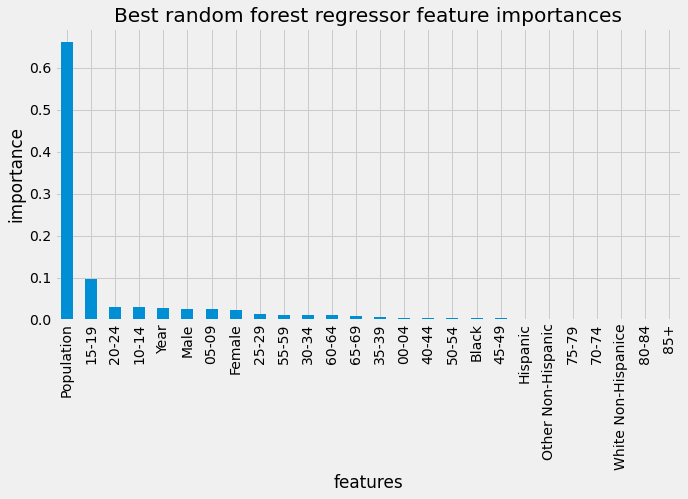

In [112]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');